In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_validate, PredefinedSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [54]:
"""data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
# Filtrar data_train
data_train = data_train[data_train['min_price'] < 100]

# Filtrar data_test
data_test = data_test[data_test['min_price'] < 100]"""


In [ ]:
import os
import sys

# Añadimos la carpeta 'drive' al path
ruta_carpeta_drive = os.path.abspath('../drive') #.. era para salirse de la carpeta actual y entrar en la de drive
if ruta_carpeta_drive not in sys.path:
    sys.path.insert(0, ruta_carpeta_drive)

import drive

# Descargamos los datos en formato parquet de Google Drive y guardarmos localmente
drive.descargar_archivos_concretos('train.csv', '../drive')
drive.descargar_archivos_concretos('test.csv', '../drive')
# hay que pasarle la ruta a la carpeta drive desde donde lo estamos ejecutando
# leer para utilizar esto ya en el modelo
data_train = pd.read_csv('datos/train.csv') # 
data_test = pd.read_csv('datos/test.csv') # 

# Filtrar data_train
data_train = data_train[data_train['max_price'] < 100]

# Filtrar data_test
data_test = data_test[data_test['max_price'] < 100]

In [55]:
data_train

,name,EventStartTime,SalesStartTIme,SalesEndTime,max_price,nameArtist,VenueName,VenueCity,VenueState,num_links,...,Soul,Urban,World,tiene_wiki,tiene_youtube,dias_Venta,dias_desdeFinVenta,num_noches,fold,min_price
0,"30 Aniversario de Sôber, con Savia y Skizoo",2024-03-08 20:00:00+00:00,2023-12-14 11:00:00+00:00,2024-03-08 20:00:00+00:00,28.00,Sober,Live Las Ventas,Madrid,Madrid,1,...,0,0,0,0,0,85,0,1,0,28.00
1,"30 Aniversario de Sôber, con Savia y Skizoo | ...",2024-03-08 20:00:00+00:00,2023-12-14 11:00:00+00:00,2024-03-08 20:00:00+00:00,50.00,Sober,Live Las Ventas,Madrid,Madrid,1,...,0,0,0,0,0,85,0,1,0,50.00
6,Abba The New Experience & Queen Forever,2024-05-29 18:00:00+00:00,2024-02-28 14:00:00+00:00,2024-05-29 18:00:00+00:00,20.00,Abba The New Experience,Zona Camping Circuit Catalunya,Montmeló,Barcelona,0,...,0,0,0,0,0,91,0,1,0,20.00
7,Abraham Mateo y Nil Moliner,2024-08-16 20:00:00+00:00,2024-01-18 11:00:00+00:00,2024-08-14 21:59:00+00:00,57.14,Abraham Mateo,Auditorio Starlite,Marbella,Málaga,9,...,0,0,0,1,1,209,1,1,0,30.01
8,Abraham Mateo y Nil Moliner,2024-04-18 19:00:00+00:00,2023-11-16 11:00:00+00:00,2024-02-21 13:45:00+00:00,58.93,Abraham Mateo,Auditorio Starlite,Marbella,Málaga,9,...,0,0,0,1,1,97,57,1,0,30.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Yung Sarria,2024-03-30 20:00:00+00:00,2023-10-06 13:00:00+00:00,2024-03-30 20:00:00+00:00,40.00,Yung Sarria,Sala Shoko,Madrid,Madrid,0,...,0,1,0,0,0,176,0,1,3,12.00
490,ZENOBIA + DEBLER,2024-06-01 19:30:00+00:00,2024-02-20 09:00:00+00:00,2024-06-01 19:30:00+00:00,22.00,Zenobia,Sala Shoko,Madrid,Madrid,1,...,0,0,0,0,0,102,0,1,3,22.00
491,gREAT sTRAITS,2024-10-19 19:30:00+00:00,2024-01-02 11:00:00+00:00,2024-10-19 19:30:00+00:00,35.00,gREAT sTRAITS,Sala Razzmatazz 1,Barcelona,Barcelona,0,...,0,0,0,0,0,291,0,1,3,35.00
492,gREAT sTRAITS,2024-09-13 19:30:00+00:00,2023-12-22 09:00:00+00:00,2024-09-13 19:30:00+00:00,75.00,gREAT sTRAITS,La Riviera,Madrid,Madrid,0,...,0,0,0,0,0,266,0,1,3,38.00


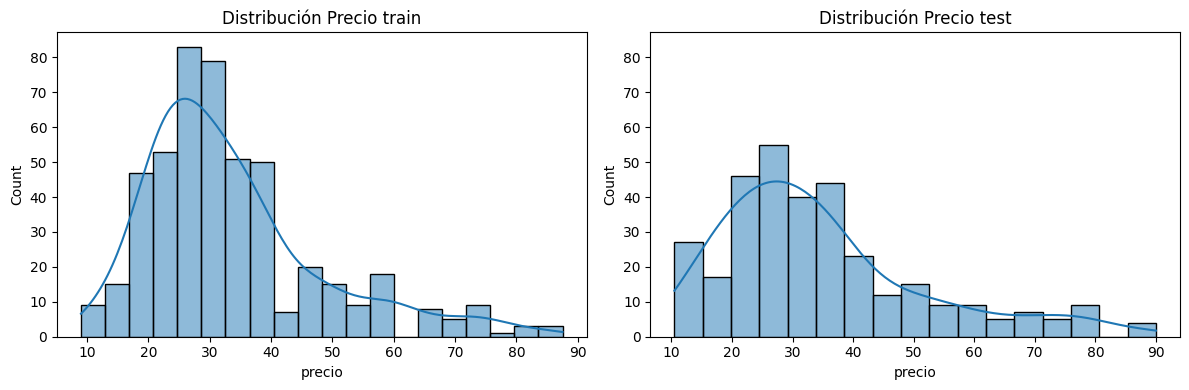

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(data=data_train, x='min_price', kde=True, ax=ax1)
ax1.set_title("Distribución Precio train")
ax1.set_xlabel('precio')

sns.histplot(data=data_test, x='min_price', kde=True, ax=ax2)
ax2.set_title("Distribución Precio test")
ax2.set_xlabel('precio')

# Encontrar el valor máximo de y en ambos gráficos
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

# Establecer el mismo límite para ambos ejes y
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()

In [57]:
# Eliminamos las categoricas
columnas=['name','EventStartTime', 'SalesStartTIme', 'SalesEndTime', 'nameArtist', 'VenueName',
          'VenueCity', 'VenueState','Generos_combinados', 'max_price']

train = data_train.drop(columnas, axis=1)
train = train.drop('fold', axis=1)
test = data_test.drop(columnas, axis=1)

RANDOM_STATE = 83 #fijamos la semilla


In [58]:
def plot_model_predictions(mlp, X, y, datos1):
    # Entrenar el modelo
    mlp.fit(X, y)
    # Realiza predicciones con el pipeline ajustado
    predicciones = mlp.predict(X)

    # Crea un DataFrame con los precios reales, predichos y el nombre del concierto
    df = pd.DataFrame({'Nombre del Concierto': datos1['name'], 'Precio Real': y, 'Precio Predicho': predicciones})

    # Crea un scatter plot interactivo con Plotly
    fig = px.scatter(df, x='Precio Real', y='Precio Predicho', color='Nombre del Concierto',
                     title='Comparación de Precios Reales vs Precios Predichos',
                     labels={'Precio Real': 'Precio Real', 'Precio Predicho': 'Precio Predicho'})

    # Agrega una línea diagonal que representa la igualdad entre los precios reales y predichos
    fig.add_shape(type='line',
                  x0=df['Precio Real'].min(), y0=df['Precio Real'].min(),
                  x1=df['Precio Real'].max(), y1=df['Precio Real'].max(),
                  line=dict(color='red', width=2, dash='dash'))

    fig.show()

In [59]:
train

,num_links,seguidoresSpotify,popularidad,subsYT,VenueClass,NumGeneros,peso_promotor,tiene_lastfm_url,conciertos_del_artista_en_ciudad,tiene_twitter,...,Singer-Songwriter,Soul,Urban,World,tiene_wiki,tiene_youtube,dias_Venta,dias_desdeFinVenta,num_noches,min_price
0,1,4.564084e+06,60.904615,1.716398e+06,2,1,22,0,2.0,0,...,0,0,0,0,0,0,85,0,1,28.00
1,1,4.564084e+06,60.904615,1.716398e+06,2,1,22,0,2.0,0,...,0,0,0,0,0,0,85,0,1,50.00
6,0,4.564084e+06,60.904615,1.716398e+06,1,1,2,0,1.0,0,...,0,0,0,0,0,0,91,0,1,20.00
7,9,4.564084e+06,60.904615,1.716398e+06,0,1,65,1,2.0,1,...,0,0,0,0,1,1,209,1,1,30.01
8,9,4.564084e+06,60.904615,1.716398e+06,0,1,65,1,2.0,1,...,0,0,0,0,1,1,97,57,1,30.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0,4.564084e+06,60.904615,1.716398e+06,0,1,3,0,1.0,0,...,0,0,1,0,0,0,176,0,1,12.00
490,1,4.564084e+06,60.904615,1.716398e+06,0,1,8,0,1.0,0,...,0,0,0,0,0,0,102,0,1,22.00
491,0,4.564084e+06,60.904615,1.716398e+06,0,1,2,0,1.0,0,...,0,0,0,0,0,0,291,0,1,35.00
492,0,4.564084e+06,60.904615,1.716398e+06,1,1,2,0,1.0,0,...,0,0,0,0,0,0,266,0,1,38.00


In [60]:
# Definir la variable objetivo y las características
y_train = train['min_price']
X_train = train.drop('min_price', axis=1)

# Definir la variable objetivo y las características
y_test = test['min_price']
X_test = test.drop('min_price', axis=1)

In [61]:
X_test['New Wave']=0
X_test['Performance Art']=0

In [62]:
len(X_train.columns)

56

In [63]:
len(X_test.columns)

56

In [64]:
X_train

,num_links,seguidoresSpotify,popularidad,subsYT,VenueClass,NumGeneros,peso_promotor,tiene_lastfm_url,conciertos_del_artista_en_ciudad,tiene_twitter,...,Rock,Singer-Songwriter,Soul,Urban,World,tiene_wiki,tiene_youtube,dias_Venta,dias_desdeFinVenta,num_noches
0,1,4.564084e+06,60.904615,1.716398e+06,2,1,22,0,2.0,0,...,1,0,0,0,0,0,0,85,0,1
1,1,4.564084e+06,60.904615,1.716398e+06,2,1,22,0,2.0,0,...,1,0,0,0,0,0,0,85,0,1
6,0,4.564084e+06,60.904615,1.716398e+06,1,1,2,0,1.0,0,...,1,0,0,0,0,0,0,91,0,1
7,9,4.564084e+06,60.904615,1.716398e+06,0,1,65,1,2.0,1,...,0,0,0,0,0,1,1,209,1,1
8,9,4.564084e+06,60.904615,1.716398e+06,0,1,65,1,2.0,1,...,0,0,0,0,0,1,1,97,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0,4.564084e+06,60.904615,1.716398e+06,0,1,3,0,1.0,0,...,0,0,0,1,0,0,0,176,0,1
490,1,4.564084e+06,60.904615,1.716398e+06,0,1,8,0,1.0,0,...,1,0,0,0,0,0,0,102,0,1
491,0,4.564084e+06,60.904615,1.716398e+06,0,1,2,0,1.0,0,...,1,0,0,0,0,0,0,291,0,1
492,0,4.564084e+06,60.904615,1.716398e+06,1,1,2,0,1.0,0,...,1,0,0,0,0,0,0,266,0,1


In [65]:
X_test = X_test[X_train.columns]
X_test

,num_links,seguidoresSpotify,popularidad,subsYT,VenueClass,NumGeneros,peso_promotor,tiene_lastfm_url,conciertos_del_artista_en_ciudad,tiene_twitter,...,Rock,Singer-Songwriter,Soul,Urban,World,tiene_wiki,tiene_youtube,dias_Venta,dias_desdeFinVenta,num_noches
0,7,2.572597e+06,56.162602,2.591877e+06,2,1,2,1,2.0,1,...,1,0,0,0,0,1,1,171,0,2
1,7,2.817062e+06,75.000000,2.890000e+06,2,2,7,0,1.0,1,...,1,0,0,0,0,0,1,364,0,1
2,3,2.572597e+06,56.162602,2.591877e+06,1,1,2,0,1.0,0,...,1,0,0,0,1,1,0,212,0,1
3,9,2.572597e+06,56.162602,2.591877e+06,2,1,2,1,2.0,1,...,1,0,0,0,1,1,1,215,0,1
4,0,2.572597e+06,56.162602,2.591877e+06,1,1,3,0,1.0,0,...,1,0,0,0,0,0,0,237,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0,2.572597e+06,56.162602,2.591877e+06,2,1,4,0,1.0,0,...,0,0,0,0,0,0,0,187,0,1
332,0,2.572597e+06,56.162602,2.591877e+06,2,1,1,0,1.0,0,...,0,0,0,0,0,0,0,211,0,1
333,0,2.572597e+06,56.162602,2.591877e+06,2,1,5,0,1.0,0,...,1,0,0,0,0,0,0,197,0,1
334,0,2.572597e+06,56.162602,2.591877e+06,0,1,1,0,1.0,0,...,0,0,0,0,0,0,0,198,0,1


In [66]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)

Dimensiones de X_train: (485, 56)
Dimensiones de y_train: (485,)


In [67]:
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_test: (327, 56)
Dimensiones de y_test: (327,)


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Definir el modelo RandomForestRegressor con los hiperparámetros dados
modelo_rf = RandomForestRegressor(n_estimators=50,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  max_depth=35,
                                  random_state=RANDOM_STATE)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)
# Predecir en el conjunto de entrenamiento
y_pred_train = modelo_rf.predict(X_train)

# Calcular métricas sobre el conjunto de entrenamiento
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Métricas sobre el conjunto de entrenamiento:")
print("MAPE Train:", mape_train)
print("RMSE Train:", rmse_train)
print("MAE Train:", mae_train)

# Predecir en el conjunto de prueba
y_pred_test = modelo_rf.predict(X_test)

# Calcular métricas sobre el conjunto de prueba
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nMétricas sobre el conjunto de prueba:")
print("MAPE Test:", mape_test)
print("RMSE Test:", rmse_test)
print("MAE Test:", mae_test)


Métricas sobre el conjunto de entrenamiento:
MAPE Train: 0.08577118018473065
RMSE Train: 4.722682659983263
MAE Train: 2.841873032698115

Métricas sobre el conjunto de prueba:
MAPE Test: 0.29699754080496754
RMSE Test: 15.668199321801186
MAE Test: 10.685436609073903


In [69]:
# Definir el modelo con los parámetros específicos o los mejores encontrados
best_model_random = RandomForestRegressor(n_estimators=50,
                                          min_samples_split=5,
                                          min_samples_leaf=2,
                                          max_depth=35,
                                          random_state=RANDOM_STATE)  # Ajusta la semilla aleatoria según sea necesario

# Entrenar el modelo con los datos de entrenamiento
best_model_random.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
predicciones = best_model_random.predict(X_test)

# Crear DataFrame con los precios reales, predichos y el nombre del concierto
df_predicciones = pd.DataFrame({
    'Nombre del Concierto': data_test['name'],
    'Precio Real': y_test,
    'Precio Predicho': predicciones
})
# Crear scatter plot interactivo con Plotly
fig = px.scatter(df_predicciones, x='Precio Real', y='Precio Predicho', color='Nombre del Concierto',
                 title='Comparación de Precios Reales vs Precios Predichos (Random Forest)',
                 labels={'Precio Real': 'Precio Real', 'Precio Predicho': 'Precio Predicho'})

# Agregar una línea diagonal que representa la igualdad entre los precios reales y predichos
fig.add_shape(type='line',
              x0=df_predicciones['Precio Real'].min(), y0=df_predicciones['Precio Real'].min(),
              x1=df_predicciones['Precio Real'].max(), y1=df_predicciones['Precio Real'].max(),
              line=dict(color='red', width=2, dash='dash'))

# Mostrar el gráfico interactivo
fig.show()


In [76]:
def rmse_with_respect_to_median(predictions, actuals):
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    median_actuals = np.median(actuals)
    squared_errors = (predictions - median_actuals) ** 2
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse)
    return rmse

def mape_with_respect_to_median(predictions, actuals):
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    median_actuals = np.median(actuals)
    percentage_errors = np.abs(predictions - median_actuals) / median_actuals
    mape = np.mean(percentage_errors) * 100
    return mape


In [77]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
# Definir el modelo con los parámetros específicos o los mejores encontrados
best_model_random = RandomForestRegressor(n_estimators=50,
                                          min_samples_split=5,
                                          min_samples_leaf=2,
                                          max_depth=35,
                                          random_state=RANDOM_STATE)

# Entrenar el modelo con los datos de entrenamiento
best_model_random.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = best_model_random.predict(X_train)

# Calcular métricas sobre el conjunto de entrenamiento
metrics_train = {
    'MedAE': median_absolute_error(y_train, y_train_pred),
    'MedAPE': mape_with_respect_to_median(y_train_pred, y_train),
    'MedRMSE': rmse_with_respect_to_median(y_train_pred, y_train),
    'MAPE': mean_absolute_percentage_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
}

# Realizar predicciones en el conjunto de prueba
y_test_pred = best_model_random.predict(X_test)

# Calcular las métricas para el conjunto de prueba
metrics_test = {
    'MedAE': median_absolute_error(y_test, y_test_pred),
    'MedAPE': mape_with_respect_to_median(y_test_pred, y_test),
    'MedRMSE': rmse_with_respect_to_median(y_test_pred, y_test),
    'MAPE': mean_absolute_percentage_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
}

# Imprimir los resultados de las métricas para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
for metric_name, metric_value in metrics_train.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Imprimir los resultados de las métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
for metric_name, metric_value in metrics_test.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Crear DataFrame con los precios reales, predichos, desviación y el nombre del concierto
df_predicciones = pd.DataFrame({
    'Nombre del Concierto': data_test['name'],
    'Precio Real': y_test,
    'Precio Predicho': y_test_pred,
    'Desviación Absoluta': np.abs(y_test - y_test_pred)
})

# Crear scatter plot interactivo con Plotly
fig = px.scatter(df_predicciones, x='Precio Real', y='Precio Predicho', color='Desviación Absoluta',
                 title='Comparación de Precios Reales vs Precios Predichos (Random Forest)',
                 labels={'Precio Real': 'Precio Real', 'Precio Predicho': 'Precio Predicho'},
                 hover_data=['Nombre del Concierto', 'Desviación Absoluta'])

# Agregar una línea diagonal que representa la igualdad entre los precios reales y predichos
fig.add_shape(type='line',
              x0=df_predicciones['Precio Real'].min(), y0=df_predicciones['Precio Real'].min(),
              x1=df_predicciones['Precio Real'].max(), y1=df_predicciones['Precio Real'].max(),
              line=dict(color='red', width=2, dash='dash'))

# Mostrar el gráfico interactivo
fig.show()


Métricas para el conjunto de entrenamiento:
MedAE: 1.4455
MedAPE: 32.3149
MedRMSE: 13.6288
MAPE: 0.0858
RMSE: 4.7227

Métricas para el conjunto de prueba:
MedAE: 6.8937
MedAPE: 18.9753
MedRMSE: 7.3872
MAPE: 0.2970
RMSE: 15.6682


In [72]:
data_test['VenueClass'].unique()

array([2, 1, 3, 0])


Características más importantes del modelo:
popularidad: 0.3047700341302792
seguidoresSpotify: 0.14181227194099333
VenueClass: 0.09743488190688797
conciertos_del_artista_en_ciudad: 0.09007096388095526
peso_promotor: 0.07093606631529674
dias_Venta: 0.061310071612989
NumGeneros: 0.04234923827135604
Latin: 0.028094559144458815
num_links: 0.02484906310798673
tiene_homepage: 0.02126748461961421


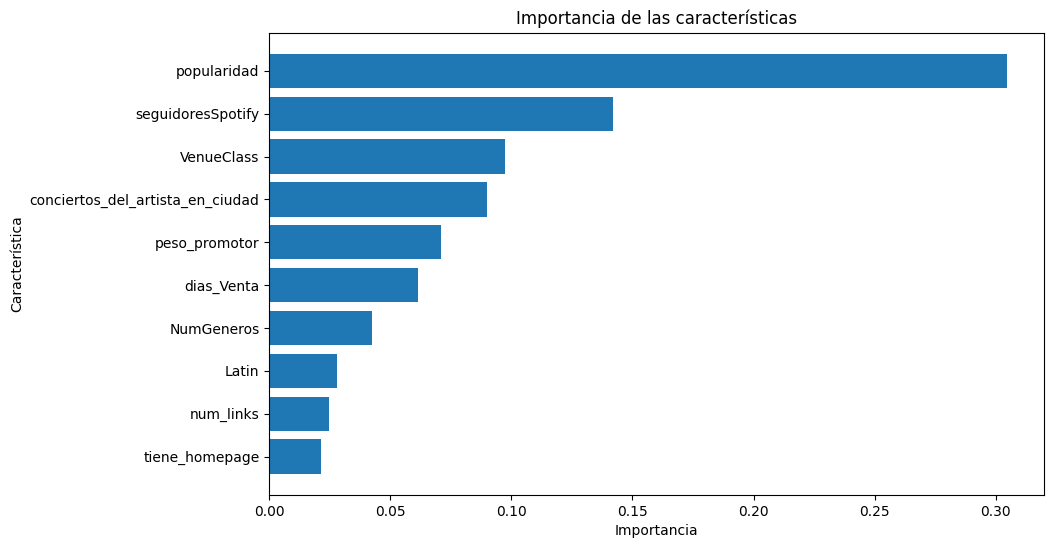

In [73]:
# Importancia de las características
feature_importance_random = best_model_random.feature_importances_
top_indices_random = np.argsort(feature_importance_random)[::-1][:10]

print("\nCaracterísticas más importantes del modelo:")
for i in top_indices_random:
    print(f"{X_test.columns[i]}: {feature_importance_random[i]}")

# Crear un DataFrame para las importancias de las características
df_feature_importance = pd.DataFrame({
    'Característica': X_test.columns[top_indices_random],
    'Importancia': feature_importance_random[top_indices_random]
})

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Característica'], df_feature_importance['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.gca().invert_yaxis()
plt.show()

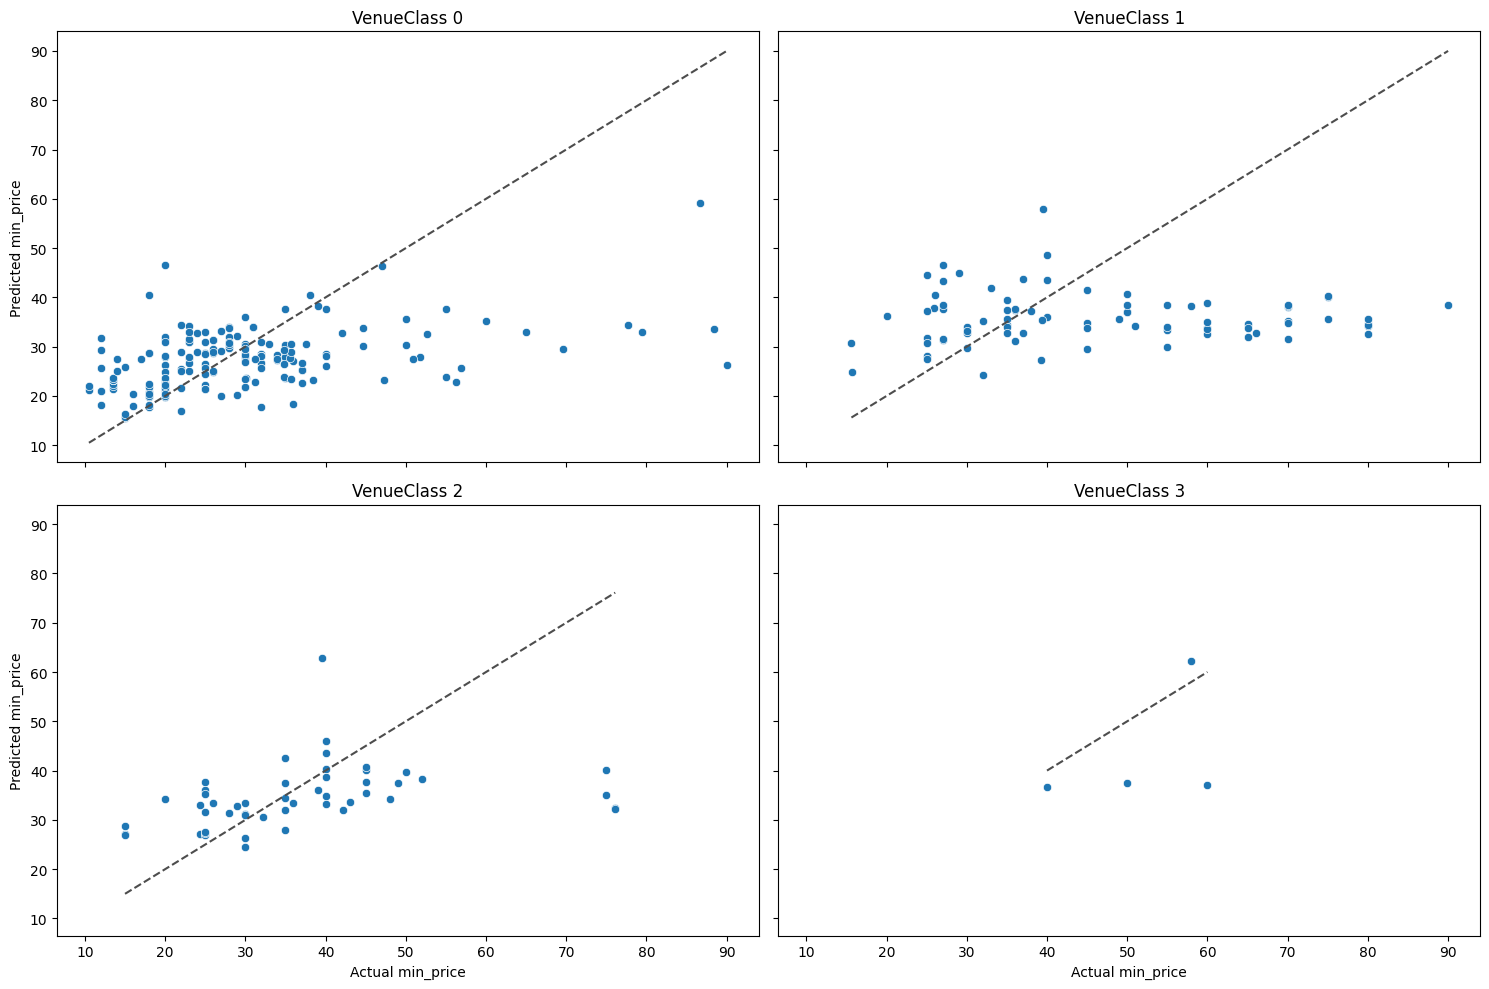

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones con el modelo entrenado sobre X_test
predicciones = best_model_random.predict(X_test)

# Crear DataFrame con valores reales y predichos
df_predicciones = pd.DataFrame({
    'min_price_real': y_test,  # Valores reales
    'min_price_pred': predicciones  # Valores predichos
})

# Agregar la columna VenueClass a df_predicciones si es necesario
# Suponiendo que VenueClass está en el DataFrame original 'datos' y es necesario
# df_predicciones['VenueClass'] = datos.loc[X_test.index, 'VenueClass']

# Crear gráficos de dispersión para comparar predicciones con valores reales por cada "VenueClass"
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Asegurarnos de que los valores de 'VenueClass' están ordenados para una mejor visualización
venue_classes = sorted(data_test['VenueClass'].unique())

for idx, vc in enumerate(venue_classes):
    subset = df_predicciones.loc[X_test['VenueClass'] == vc]
    ax = axes[idx//2, idx%2]  # Ubicación del gráfico en la cuadrícula
    sns.scatterplot(ax=ax, x='min_price_real', y='min_price_pred', data=subset)
    ax.plot([subset['min_price_real'].min(), subset['min_price_real'].max()],
            [subset['min_price_real'].min(), subset['min_price_real'].max()],
            ls="--", c=".3")
    ax.set_title(f'VenueClass {vc}')
    ax.set_xlabel('Actual min_price')
    ax.set_ylabel('Predicted min_price')

plt.tight_layout()
plt.show()
